<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#summary" data-toc-modified-id="summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>summary</a></span></li><li><span><a href="#attrib" data-toc-modified-id="attrib-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>attrib</a></span></li><li><span><a href="#message" data-toc-modified-id="message-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>message</a></span></li><li><span><a href="#session-(when-user-engages-with-the-app)" data-toc-modified-id="session-(when-user-engages-with-the-app)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>session (when user engages with the app)</a></span><ul class="toc-item"><li><span><a href="#convert-to-datetime" data-toc-modified-id="convert-to-datetime-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>convert to datetime</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#number-of-sessions-per-user" data-toc-modified-id="number-of-sessions-per-user-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>number of sessions per user</a></span></li><li><span><a href="#first-session" data-toc-modified-id="first-session-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>first session</a></span></li><li><span><a href="#is_developer" data-toc-modified-id="is_developer-1.4.2.3"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>is_developer</a></span></li><li><span><a href="#os_name" data-toc-modified-id="os_name-1.4.2.4"><span class="toc-item-num">1.4.2.4&nbsp;&nbsp;</span>os_name</a></span></li><li><span><a href="#previous_sessions_duration-per-user" data-toc-modified-id="previous_sessions_duration-per-user-1.4.2.5"><span class="toc-item-num">1.4.2.5&nbsp;&nbsp;</span>previous_sessions_duration per user</a></span></li></ul></li></ul></li><li><span><a href="#events" data-toc-modified-id="events-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>events</a></span><ul class="toc-item"><li><span><a href="#label-prep" data-toc-modified-id="label-prep-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>label prep</a></span></li></ul></li><li><span><a href="#sample-submission" data-toc-modified-id="sample-submission-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>sample submission</a></span></li></ul></li><li><span><a href="#Join-Tables-(session-+-event)" data-toc-modified-id="Join-Tables-(session-+-event)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Join Tables (session + event)</a></span></li><li><span><a href="#Train-val-data" data-toc-modified-id="Train-val-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train val data</a></span></li><li><span><a href="#model" data-toc-modified-id="model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>model</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import numpy as np 
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import warnings
plt.style.use('ggplot')

# EDA

## summary
|_|**SESSION**|**EVENT**|**sample submission**|
|---|---|---|---|
|total rows|6,239,836|111,946,597|312,568|
|unique user_id_hash|621,106|621,001|312,568|
|unique session_id|6,000,342|5,009,421|na|
|unique session_id & user_id_hash comb|6,000,342|5,009,421|na|

## attrib

In [2]:
types = {'app_id':'category', 'session_id':'category', 'attribute':'category', 'attribute_value':'category', 'user_id_hash':'category'}
attrib = pd.read_csv('../data/attributes.csv', sep=",(?![^\[]*\])", dtype=types, nrows=100)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
attrib.head()

,app_id,session_id,attribute,attribute_value,user_id_hash
0,4724682771660800,2201961907282901522,0,1,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,4724682771660800,2201961907282901522,1,1,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,4724682771660800,2201961907282901522,3,0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,4724682771660800,2201961907282901522,4,0.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,4724682771660800,2201961907282901522,5,romance_the_royal_romance_02:11,9943447915df3a45fd6720a026af905b6da6b56a37701b...


## message

In [4]:
messages = pd.read_csv('../data/messages.csv')

In [5]:
messages.head()

,app_id,message_id,action_type,delivery_type,delivery_time_mode,goal_kind
0,6196435404455936,5420304779837440,__Push Notification,4,3,NaN
1,6196435404455936,5059935179767808,__Push Notification,0,3,NaN
2,6196435404455936,6563799154425856,__Webhook,4,3,NaN
3,6196435404455936,4680497250304000,__Push Notification,0,3,NaN
4,4724682771660800,6286714069450752,Center Popup,0,3,3.0


## session (when user engages with the app)

In [6]:
session_path = '../data/sessions.csv'
session_types = {'session_id':'category', 'start_timestamp':np.uint64, 'timezone':'category', 
                 'previous_sessions_duration':np.uint32, 'user_created_timestamp':np.uint64,
                 'is_user_first_session':np.bool, 'is_session':np.bool, 'is_developer':np.bool, 
                 'country':'category', 'region':'category', 'city':'category', 'os_name':'category', 
                 'session_index':np.uint16, 'user_id_hash':'category'}

In [7]:
session = pd.read_csv(session_path, usecols=session_types.keys(), dtype=types)

In [8]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239836 entries, 0 to 6239835
Data columns (total 14 columns):
session_id                    category
start_timestamp               int64
timezone                      object
previous_sessions_duration    int64
user_created_timestamp        int64
is_user_first_session         bool
is_session                    bool
is_developer                  bool
country                       object
region                        object
city                          object
os_name                       object
session_index                 int64
user_id_hash                  category
dtypes: bool(3), category(2), int64(4), object(5)
memory usage: 724.4+ MB


### convert to datetime

In [9]:
session['start_timestamp'] = pd.to_datetime(session.start_timestamp, unit='ms')
session['user_created_timestamp'] = pd.to_datetime(session.user_created_timestamp, unit='ms')

In [10]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239836 entries, 0 to 6239835
Data columns (total 14 columns):
session_id                    category
start_timestamp               datetime64[ns]
timezone                      object
previous_sessions_duration    int64
user_created_timestamp        datetime64[ns]
is_user_first_session         bool
is_session                    bool
is_developer                  bool
country                       object
region                        object
city                          object
os_name                       object
session_index                 int64
user_id_hash                  category
dtypes: bool(3), category(2), datetime64[ns](2), int64(2), object(5)
memory usage: 724.4+ MB


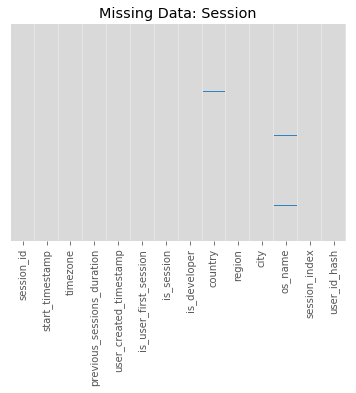

In [11]:
sns.heatmap(session.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data: Session')
plt.show()

In [12]:
null_columns=session.columns[session.isnull().any()]
session[null_columns].isnull().sum()

timezone     9538
country     16657
region      12926
city        12918
os_name     27444
dtype: int64

In [13]:
session.head()

,session_id,start_timestamp,timezone,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,country,region,city,os_name,session_index,user_id_hash
0,5558845121177764917,2018-11-14 17:09:24.580,Asia/Manila,25837591,2018-10-07 01:04:49.458,False,True,False,PH,00,makati,Android OS,30,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,2201961907282901522,2018-12-02 01:09:37.293,Asia/Manila,35050130,2018-10-07 01:04:49.458,False,True,False,PH,00,quezon city,Android OS,47,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,18781111175537580,2018-10-10 23:52:48.666,Asia/Manila,11343848,2018-10-07 01:04:49.458,False,True,False,PH,00,makati,Android OS,10,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,1477540082628742048,2018-10-21 11:19:03.010,Asia/Manila,13499724,2018-10-07 01:04:49.458,False,True,False,PH,11,davao city,Android OS,13,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,8184875317380844086,2018-11-19 23:53:45.528,Asia/Manila,32788010,2018-10-07 01:04:49.458,False,True,False,PH,00,makati,Android OS,41,9943447915df3a45fd6720a026af905b6da6b56a37701b...


In [14]:
len(session.user_id_hash.unique())

621106

621,106 unique user ID in session

In [ ]:
event[~event.session_id.isin(session.session_id.unique())]

### EDA

#### number of sessions per user

Text(0,0.5,'sessions per user')

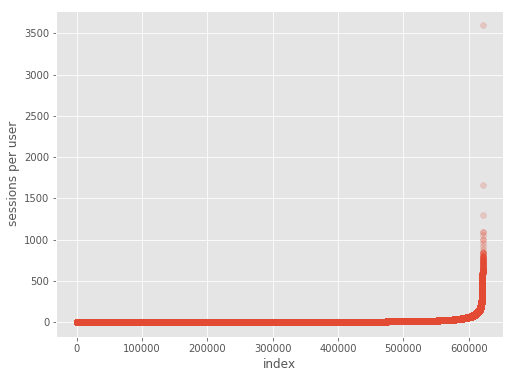

In [15]:
session.groupby('user_id_hash').size()
mytest = session.groupby('user_id_hash').size().to_frame().sort_values(0)
mytest
plt.figure(figsize=(8,6))
plt.scatter(range(mytest.shape[0]), np.sort(mytest[0].values), alpha=0.2)
plt.xlabel('index', fontsize=12)
plt.ylabel('sessions per user', fontsize=12)

In [17]:
session[session.user_id_hash=='032157aa246bf70742c4fe3490424125248fe585aef8c61c1c10424d46c0f3f9'].head()

,session_id,start_timestamp,timezone,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,country,region,city,os_name,session_index,user_id_hash
3458464,6200947363604086275,2018-11-29 09:05:26.179,Asia/Chita,323118577,2018-11-06 10:18:02.545,False,True,False,JP,26,kyoto,Android OS,91,032157aa246bf70742c4fe3490424125248fe585aef8c6...
3458465,8808057885827027943,2018-12-02 13:08:04.734,Asia/Tokyo,392400016,2018-11-06 10:18:02.545,False,False,False,JP,26,kyoto,Android OS,104,032157aa246bf70742c4fe3490424125248fe585aef8c6...
3458466,5003981994074078829,2018-12-02 08:36:29.939,Asia/Tokyo,391922805,2018-11-06 10:18:02.545,False,False,False,JP,26,kyoto,Android OS,101,032157aa246bf70742c4fe3490424125248fe585aef8c6...
3458467,5927676565817965441,2018-12-02 13:10:16.991,Asia/Tokyo,392400016,2018-11-06 10:18:02.545,False,False,False,JP,26,kyoto,Android OS,104,032157aa246bf70742c4fe3490424125248fe585aef8c6...
3458468,1545102487070331890,2018-12-02 10:41:41.826,Asia/Tokyo,391922805,2018-11-06 10:18:02.545,False,False,False,JP,26,kyoto,Android OS,101,032157aa246bf70742c4fe3490424125248fe585aef8c6...


Looks strange that some users have extremely high number of sessions.

#### first session

In [18]:
session.is_user_first_session.value_counts()/len(session)

False    0.863959
True     0.136041
Name: is_user_first_session, dtype: float64

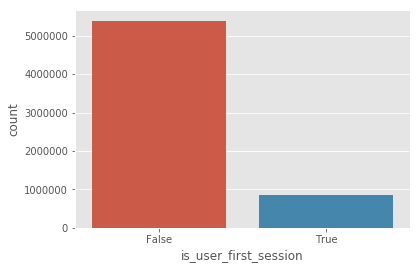

In [19]:
sns.countplot(x='is_user_first_session', data=session);

Most sessions are not first session.

#### is_developer

In [20]:
session.is_developer.value_counts()/len(session)

False    0.999585
True     0.000415
Name: is_developer, dtype: float64

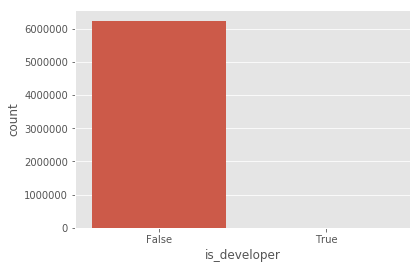

In [21]:
sns.countplot(x='is_developer', data=session);

Looks like very few developers exist in the data set.

#### os_name

In [22]:
session.os_name.value_counts()

Android OS    4207867
iOS           1962166
iPhone OS       42359
Name: os_name, dtype: int64

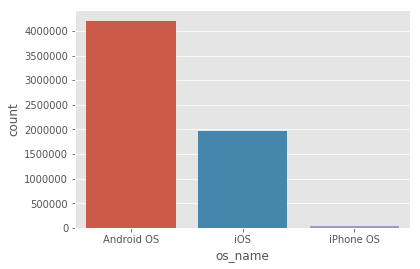

In [23]:
sns.countplot(x='os_name', data=session);

Some of IOS are using a different name, making it looks like 3 categories. We can rename for feature engineering. 

#### previous_sessions_duration per user

In [24]:
prev_dur_pu = session.previous_sessions_duration.value_counts()

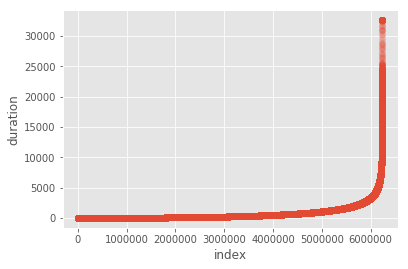

In [25]:
plt.scatter(range(session.shape[0]), np.sort(session.previous_sessions_duration.values/60000), alpha=0.1)
plt.xlabel('index', fontsize=12)
plt.ylabel('duration', fontsize=12)
plt.show()

Looks like some users previous sessions are extremely high.

Some feature engineer ideas

In [26]:
# start day of week
#session['created_dow']= session['user_created_timestamp'].dt.weekday.to_frame()

# is developer or not
#session['is_developer'] = session.is_developer.astype(int)

# number of session per user 
session_pu = session.groupby('user_id_hash').size().to_frame().reset_index()
prev_sd_pu = session.groupby('user_id_hash')['previous_sessions_duration'].mean().to_frame().reset_index()  # avg prev_session_duration per user
num_ct_pu = session.groupby('user_id_hash')['country'].count().to_frame().reset_index()

In [ ]:
#dev_nondev_pu = session[session['is_developer']==True].groupby('user_id_hash').size()/session[session['is_developer']==False].groupby('user_id_hash')

In [27]:
session_new = session.drop_duplicates()

In [399]:
session_new = session_new[['user_id_hash']]
session_new.reset_index(drop=True, inplace=True)

In [400]:
session_new.head()

,user_id_hash
0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,9943447915df3a45fd6720a026af905b6da6b56a37701b...


In [403]:
session_new = pd.merge(session_new, session_pu, on='user_id_hash', how='left')
session_new = pd.merge(session_new, prev_sd_pu, on='user_id_hash', how='left')
session_new = pd.merge(session_new, num_ct_pu, on='user_id_hash', how='left')

In [21]:
session_new.columns = ['user_id_hash','session_pu','prev_sd_pu', 'num_ct_pu']

In [22]:
session_new.head()

,user_id_hash,session_pu,prev_sd_pu,num_ct_pu
0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,49,2.128299e+07,49
1,43f75f8042d3c80c45e222bdd09267f4584684c54d6fae...,3,2.024939e+06,3
2,999524249720812f2d8c0390293efd58e1ac84d587a01c...,1,0.000000e+00,1
3,4e6bc35cf7fd79a5312047651e7865915f4a6bec193cf2...,2,2.984835e+05,2
4,dc009148ee26d658e0240c7b7f6a258790a457737f96e8...,2,4.874100e+04,2


In [395]:
len(session[session.user_id_hash.isin(sample_sub_user)].user_id_hash.unique())

312368

There are 200 users from sample submission that are not in session.

## events

In [28]:
event_path = '../data/events.csv'
event_types = {'session_id':'category', 'event':'category', 'event_timestamp':np.uint64, 
         'event_value':np.float32, 'user_id_hash':'category'}

event = pd.read_csv(event_path,usecols=event_types.keys(),dtype=event_types)

In [24]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111946597 entries, 0 to 111946596
Data columns (total 5 columns):
session_id         category
event              category
event_timestamp    uint64
event_value        float32
user_id_hash       category
dtypes: category(3), float32(1), uint64(1)
memory usage: 2.4 GB


In [72]:
event['event_timestamp'] = pd.to_datetime(event.event_timestamp, unit='ms')

In [73]:
event.head()

,session_id,event,event_timestamp,event_value,user_id_hash
0,5558845121177764917,45,2018-11-14 17:09:57.132,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,5558845121177764917,45,2018-11-14 17:11:24.895,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,7689508378645584666,.m5100869650219008,2018-11-02 02:06:50.372,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,2201961907282901522,4,2018-12-02 01:11:31.129,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,2201961907282901522,6,2018-12-02 01:11:33.116,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...


In [31]:
len(event)

111946597

In [32]:
len(event.user_id_hash.unique())

621001

621,001 user_id have activities in events table

In [36]:
len(session[~session.user_id_hash.isin(event.user_id_hash.unique())].user_id_hash.unique())

105

There are 105 user_id's do not have activities in events table

In [37]:
len(event[event.event=='8'])

265034

265,034 purchase activities

In [38]:
len(event[event.event=='8'])/len(event)

0.002367503855432068

0.0024 purchase rate

In [39]:
len(event.groupby('session_id').size())

5009421

In [40]:
len(event.groupby(['session_id', 'user_id_hash']).size())

5009421

In [74]:
event_new = event.drop_duplicates()

There are duplicated rows existing in event table, so drop duplicates.

In [27]:
len(event_new)

111940646

In [75]:
event_new.head()

,session_id,event,event_timestamp,event_value,user_id_hash
0,5558845121177764917,45,2018-11-14 17:09:57.132,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,5558845121177764917,45,2018-11-14 17:11:24.895,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,7689508378645584666,.m5100869650219008,2018-11-02 02:06:50.372,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,2201961907282901522,4,2018-12-02 01:11:31.129,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,2201961907282901522,6,2018-12-02 01:11:33.116,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...


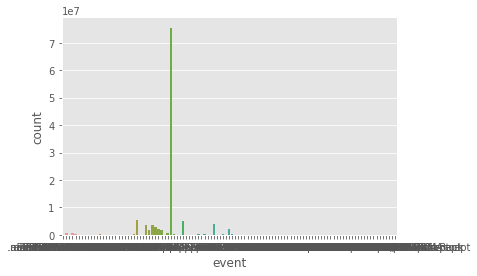

In [42]:
sns.countplot(x='event', data=event_new);

Certain event has extremely high frequency.

In [ ]:
event_new.groupby('user_id_hash').size().plot()

In [45]:
# 1. purchase nonpurchase ratio per user
pur_npur_ratio = event_new[event_new.event=='8'].groupby('user_id_hash').size()/event_new.groupby('user_id_hash').size()
pur_npur_ratio = pur_npur_ratio.to_frame().reset_index()

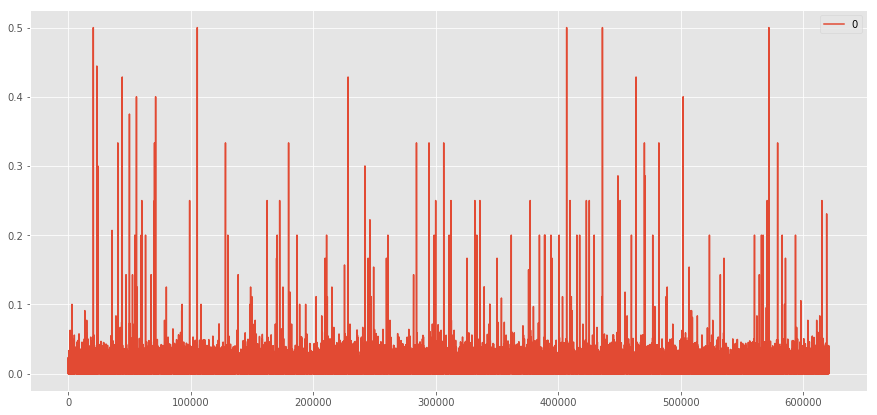

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
pur_npur_ratio.plot(ax=ax)

In [59]:
# 2. total events per user
events_pu = event_new.groupby('user_id_hash').agg({'event':np.size}).reset_index()  # same as event_new.groupby('user_id_hash').event.size()

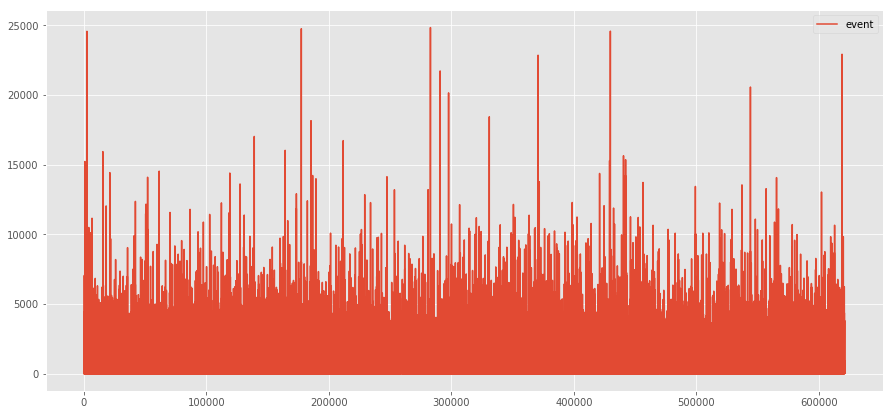

In [62]:
fig, ax = plt.subplots(figsize=(15,7))
events_pu.plot(ax=ax)

In [64]:
events_pu.head()

,user_id_hash,event
0,002e447aed33ed4c51a68743cc293ef2148058b6a6239e...,119
1,005c9d79cf18efc6c8b5fa767964b1def9b8e2f8abd23f...,24
2,0061b4d30e8a9935b2ebeec954ff509b4f0cb500cd725c...,34
3,00fbbf507c7d3c2f259cd3329d241c29d35712e2d4699f...,47
4,0107a0017873efc2dea9a9155832363ceacf6fe97bd428...,14


In [70]:
label = event_new[event_new.event=='8'].groupby('user_id_hash').size().to_frame().reset_index()
label.columns=['user_id_hash', 'label']
label.loc[label['label']>1, 'label'] = 1

### label prep

In [76]:
import datetime

user_purchase_7=event_new[(event_new.event=='8')&(event_new.event_timestamp>=pd.Timestamp(datetime.datetime(2018,12,1)))&(event_new.event_timestamp<=pd.Timestamp(datetime.datetime(2018,12,8)))].user_id_hash.unique()
user_purchase_7
print(len(user_purchase_7), 'unique users purchased in 7 days')

user_purchase_14 = event_new[(event_new.event=='8')&(event_new.event_timestamp>=pd.Timestamp(datetime.datetime(2018,12,1)))&(event_new.event_timestamp<=pd.Timestamp(datetime.datetime(2018,12,15)))].user_id_hash.unique()
user_purchase_14
print(len(user_purchase_14), 'unique users purchased in 14 days')

4729 unique users purchased in 7 days
6126 unique users purchased in 14 days


Feature ideas

In [77]:
# avg events per session per user
avg_event_pu = event_new.groupby(['user_id_hash']).event.size()/event_new.groupby(['user_id_hash']).session_id.nunique()
avg_event_pu = avg_event_pu.to_frame()

In [74]:
avg_event_pu = avg_event_pu.reset_index()

In [67]:
# total event val
eventval_pu = event_new.groupby('user_id_hash').agg({'event_value':np.sum}).reset_index()

In [85]:
event_df = event_new[['user_id_hash']].drop_duplicates().reset_index(drop=True)
event_df.head()

,user_id_hash
0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,43f75f8042d3c80c45e222bdd09267f4584684c54d6fae...
2,999524249720812f2d8c0390293efd58e1ac84d587a01c...
3,4e6bc35cf7fd79a5312047651e7865915f4a6bec193cf2...
4,dc009148ee26d658e0240c7b7f6a258790a457737f96e8...


In [87]:
event_df = pd.merge(event_df, pur_npur_ratio, on='user_id_hash', how='left')
event_df = pd.merge(event_df, events_pu, on='user_id_hash', how='left')
event_df = pd.merge(event_df, avg_event_pu, on='user_id_hash', how='left')
event_df = pd.merge(event_df, eventval_pu, on='user_id_hash', how='left')

In [81]:
pur_npur_ratio.head()

,user_id_hash,0
0,002e447aed33ed4c51a68743cc293ef2148058b6a6239e...,0.0
1,005c9d79cf18efc6c8b5fa767964b1def9b8e2f8abd23f...,0.0
2,0061b4d30e8a9935b2ebeec954ff509b4f0cb500cd725c...,0.0
3,00fbbf507c7d3c2f259cd3329d241c29d35712e2d4699f...,0.0
4,0107a0017873efc2dea9a9155832363ceacf6fe97bd428...,0.0


In [82]:
events_pu.head()

,user_id_hash,event
0,002e447aed33ed4c51a68743cc293ef2148058b6a6239e...,119
1,005c9d79cf18efc6c8b5fa767964b1def9b8e2f8abd23f...,24
2,0061b4d30e8a9935b2ebeec954ff509b4f0cb500cd725c...,34
3,00fbbf507c7d3c2f259cd3329d241c29d35712e2d4699f...,47
4,0107a0017873efc2dea9a9155832363ceacf6fe97bd428...,14


In [83]:
avg_event_pu.head()

,user_id_hash,0
0,002e447aed33ed4c51a68743cc293ef2148058b6a6239e...,39.666667
1,005c9d79cf18efc6c8b5fa767964b1def9b8e2f8abd23f...,12.000000
2,0061b4d30e8a9935b2ebeec954ff509b4f0cb500cd725c...,34.000000
3,00fbbf507c7d3c2f259cd3329d241c29d35712e2d4699f...,15.666667
4,0107a0017873efc2dea9a9155832363ceacf6fe97bd428...,14.000000


In [84]:
eventval_pu.head()

,user_id_hash,event_value
0,002e447aed33ed4c51a68743cc293ef2148058b6a6239e...,43.0
1,005c9d79cf18efc6c8b5fa767964b1def9b8e2f8abd23f...,12.0
2,0061b4d30e8a9935b2ebeec954ff509b4f0cb500cd725c...,0.0
3,00fbbf507c7d3c2f259cd3329d241c29d35712e2d4699f...,53.0
4,0107a0017873efc2dea9a9155832363ceacf6fe97bd428...,0.0


In [88]:
event_df.head()

,user_id_hash,0_x,event,0_y,event_value
0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,0.001481,675,18.243243,203.492996
1,43f75f8042d3c80c45e222bdd09267f4584684c54d6fae...,0.000000,86,43.000000,52.000000
2,999524249720812f2d8c0390293efd58e1ac84d587a01c...,0.000000,33,33.000000,47.000000
3,4e6bc35cf7fd79a5312047651e7865915f4a6bec193cf2...,0.000000,17,8.500000,0.000000
4,dc009148ee26d658e0240c7b7f6a258790a457737f96e8...,0.000000,8,4.000000,0.000000


In [89]:
event_df.columns = ['user_id_hash','pur_npur_ratio', 'events_pu', 'avg_event_pu', 'eventval_pu']

In [90]:
event_df.head()

,user_id_hash,pur_npur_ratio,events_pu,avg_event_pu,eventval_pu
0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,0.001481,675,18.243243,203.492996
1,43f75f8042d3c80c45e222bdd09267f4584684c54d6fae...,0.000000,86,43.000000,52.000000
2,999524249720812f2d8c0390293efd58e1ac84d587a01c...,0.000000,33,33.000000,47.000000
3,4e6bc35cf7fd79a5312047651e7865915f4a6bec193cf2...,0.000000,17,8.500000,0.000000
4,dc009148ee26d658e0240c7b7f6a258790a457737f96e8...,0.000000,8,4.000000,0.000000


## sample submission

In [54]:
sample_sub = pd.read_csv('../data/sample_submission_2.csv')

In [55]:
sample_sub.head()

,user_id_hash,user_purchase_binary_7_days,user_purchase_binary_14_days
0,e469dfaed039ead9110165d9bc457acb11609ca34057dc...,0.01,0.02
1,afcc639a324b6c598ef83d360450afa011cb2dd1358bf9...,0.01,0.02
2,fd5a7cf211d08e3e00f7be6a9df6e6ea3d2e5c22a5d9c3...,0.01,0.02
3,00bfff98b9d0329f014c2eeac7ce47cd18b2bc6e10d608...,0.01,0.02
4,0d298f3638c43e915c119d4935e1ce8d168f81b5e3e8c1...,0.01,0.02


In [56]:
len(sample_sub.user_id_hash.unique())

312568

# Join Tables (session + event)

In [92]:
data = pd.merge(session_new, event_df, how='left', on='user_id_hash')

In [93]:
data.head()

,user_id_hash,session_pu,prev_sd_pu,num_ct_pu,pur_npur_ratio,events_pu,avg_event_pu,eventval_pu
0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,49,2.128299e+07,49,0.001481,675.0,18.243243,203.492996
1,43f75f8042d3c80c45e222bdd09267f4584684c54d6fae...,3,2.024939e+06,3,0.000000,86.0,43.000000,52.000000
2,999524249720812f2d8c0390293efd58e1ac84d587a01c...,1,0.000000e+00,1,0.000000,33.0,33.000000,47.000000
3,4e6bc35cf7fd79a5312047651e7865915f4a6bec193cf2...,2,2.984835e+05,2,0.000000,17.0,8.500000,0.000000
4,dc009148ee26d658e0240c7b7f6a258790a457737f96e8...,2,4.874100e+04,2,0.000000,8.0,4.000000,0.000000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621106 entries, 0 to 621105
Data columns (total 8 columns):
user_id_hash      621106 non-null object
session_pu        621106 non-null int64
prev_sd_pu        621106 non-null float64
num_ct_pu         621106 non-null int64
pur_npur_ratio    621001 non-null float64
events_pu         621001 non-null float64
avg_event_pu      621001 non-null float64
eventval_pu       621001 non-null float32
dtypes: float32(1), float64(4), int64(2), object(1)
memory usage: 40.3+ MB


# Train val data

In [97]:
import datetime

user_purchase_7=event_new[(event_new.event=='8')&(event_new.event_timestamp>=pd.Timestamp(datetime.datetime(2018,12,1)))&(event_new.event_timestamp<=pd.Timestamp(datetime.datetime(2018,12,8)))].user_id_hash.unique()
user_purchase_7
print(len(user_purchase_7), 'unique users purchased in 7 days')

user_purchase_14 = event_new[(event_new.event=='8')&(event_new.event_timestamp>=pd.Timestamp(datetime.datetime(2018,12,1)))&(event_new.event_timestamp<=pd.Timestamp(datetime.datetime(2018,12,15)))].user_id_hash.unique()
user_purchase_14
print(len(user_purchase_14), 'unique users purchased in 14 days')

4729 unique users purchased in 7 days
6126 unique users purchased in 14 days


In [98]:
user_purchase_7

[280a7625f66e60896e558eaeee6b3eb0419c488eed15ef..., 0e02d992cae31bf3cc09708fc70db2cf935288bf715aa7..., f885fd72310deaa1b7591bb3af277e632c364d36bdda5e..., 5fb8780d18dfc69e2c968508d624828ecff7b504bf2719..., 75ce9e8bf0517bc7dec67b715f3caf38871135c5cd462b..., ..., 666704a3b7800c31bf3bfd6210ea9e9f5c78ae24b3d727..., 935bf98415a1892b047e3a765564839b24539ecec83266..., 37a6bda2f661e665958aaef74190ebe9124845d2d25d24..., ff191d081c4d4629082688bb95a7afd6a2ac6911ded427..., 2820306b1425196413fd71b05faab1c22a0b03c8d20fb1...]
Length: 4729
Categories (4729, object): [280a7625f66e60896e558eaeee6b3eb0419c488eed15ef..., 0e02d992cae31bf3cc09708fc70db2cf935288bf715aa7..., f885fd72310deaa1b7591bb3af277e632c364d36bdda5e..., 5fb8780d18dfc69e2c968508d624828ecff7b504bf2719..., ..., 935bf98415a1892b047e3a765564839b24539ecec83266..., 37a6bda2f661e665958aaef74190ebe9124845d2d25d24..., ff191d081c4d4629082688bb95a7afd6a2ac6911ded427..., 2820306b1425196413fd71b05faab1c22a0b03c8d20fb1...]

In [104]:
#data['label_1'] = np.where(data['user_id_hash'].isin(user_purchase_7), 1, 0)
#data['label_2'] = np.where(data['user_id_hash'].isin(user_purchase_14), 1, 0)

data['label_1'] = np.where((data['user_id_hash'].isin(sample_sub.user_id_hash.unique()))&(data.event=='8'), 1, 0)
data['label_2'] = np.where(data['user_id_hash'].isin(sample_sub.user_id_hash.unique()), 1, 0)

In [105]:
data.head()

,user_id_hash,session_pu,prev_sd_pu,num_ct_pu,pur_npur_ratio,events_pu,avg_event_pu,eventval_pu,label_1,label_2
0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,49,2.128299e+07,49,0.001481,675.0,18.243243,203.492996,0,0
1,43f75f8042d3c80c45e222bdd09267f4584684c54d6fae...,3,2.024939e+06,3,0.000000,86.0,43.000000,52.000000,0,0
2,999524249720812f2d8c0390293efd58e1ac84d587a01c...,1,0.000000e+00,1,0.000000,33.0,33.000000,47.000000,0,0
3,4e6bc35cf7fd79a5312047651e7865915f4a6bec193cf2...,2,2.984835e+05,2,0.000000,17.0,8.500000,0.000000,0,0
4,dc009148ee26d658e0240c7b7f6a258790a457737f96e8...,2,4.874100e+04,2,0.000000,8.0,4.000000,0.000000,0,0


In [109]:
data.label_1.value_counts()/len(data)

0    0.992386
1    0.007614
Name: label_1, dtype: float64

In [108]:
data.label_2.value_counts()/len(data)

0    0.990137
1    0.009863
Name: label_2, dtype: float64